In [114]:
import pandas as pd
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import statistics
import matplotlib.pyplot as plt
import math
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [141]:
df = pd.read_csv('../data/melb_data.csv')
pd.set_option('display.max_columns', None)


In [145]:
print(df[df['BuildingArea']>20000])

             Suburb         Address  Rooms Type      Price Method SellerG  \
13245  New Gisborne  71 Hamilton Rd      5    h  1355000.0      S   Raine   

             Date  Distance  Postcode  Bedroom2  Bathroom  Car  Landsize  \
13245  23/09/2017      48.1    3438.0       5.0       3.0  5.0   44500.0   

       BuildingArea  YearBuilt CouncilArea  Lattitude  Longtitude  \
13245       44515.0        NaN         NaN  -37.45392   144.58864   

              Regionname  Propertycount  
13245  Northern Victoria          849.0  


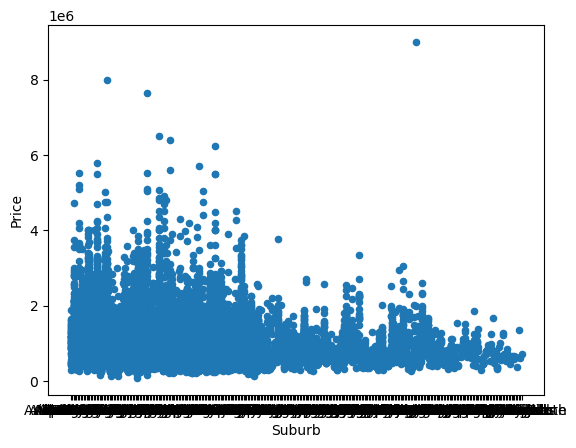

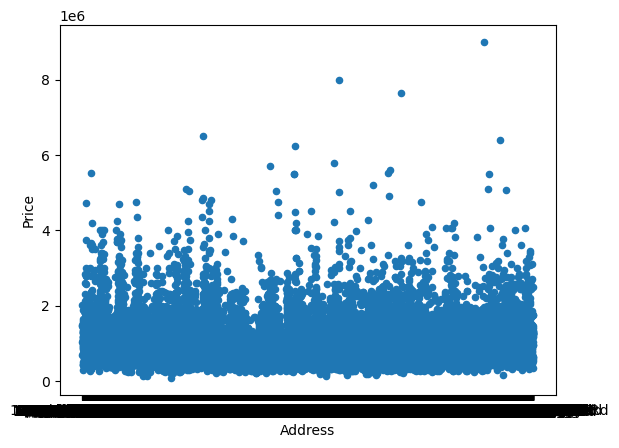

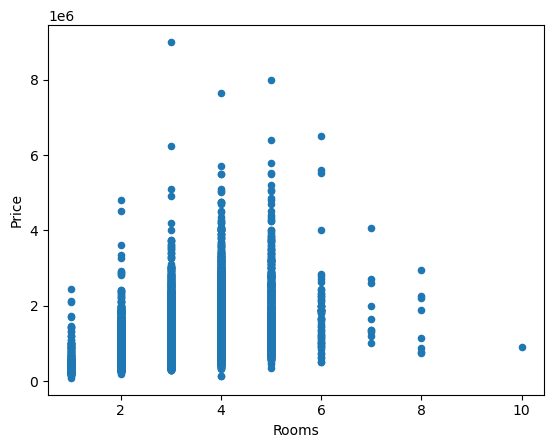

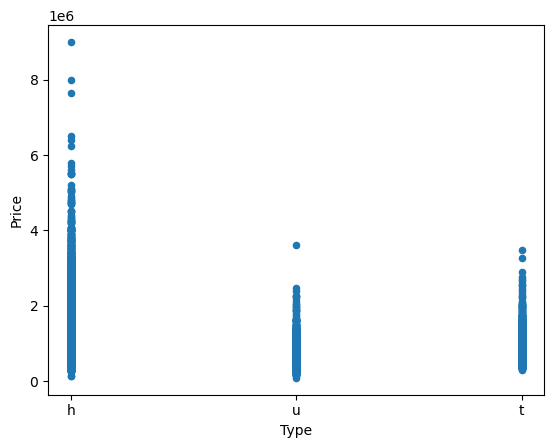

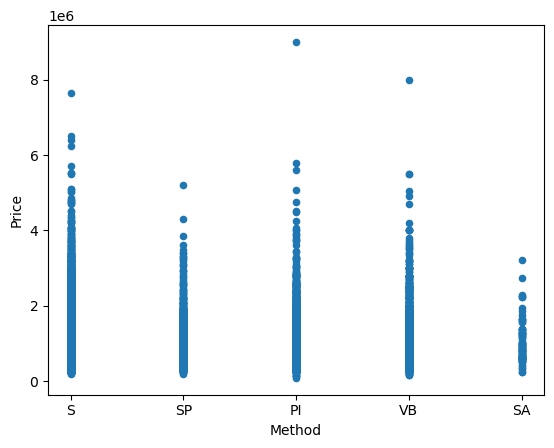

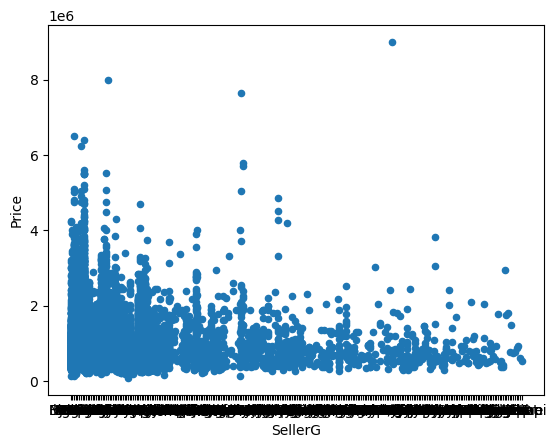

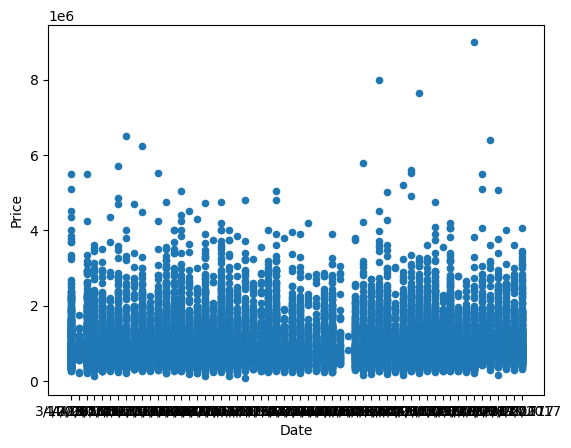

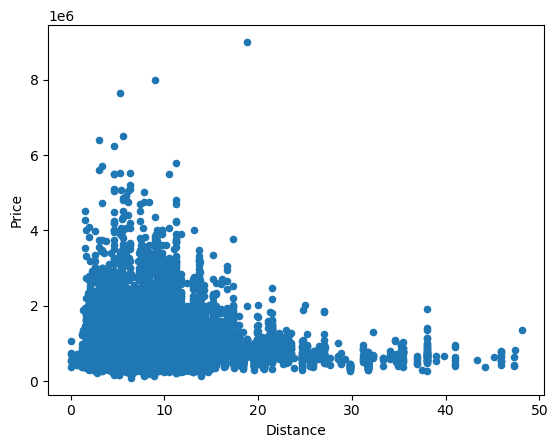

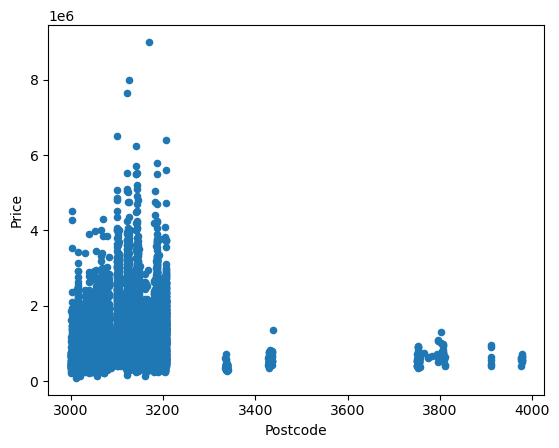

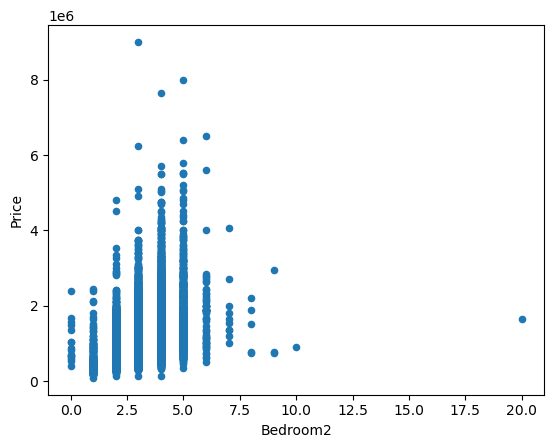

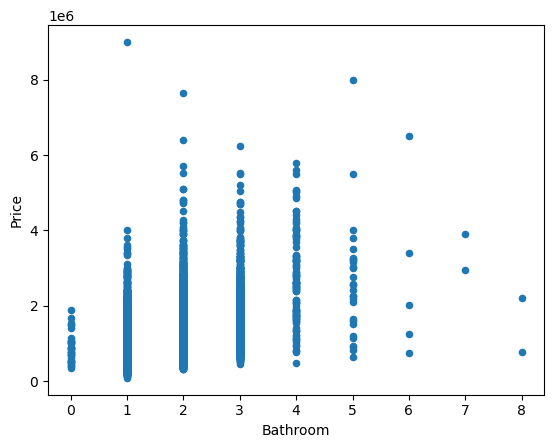

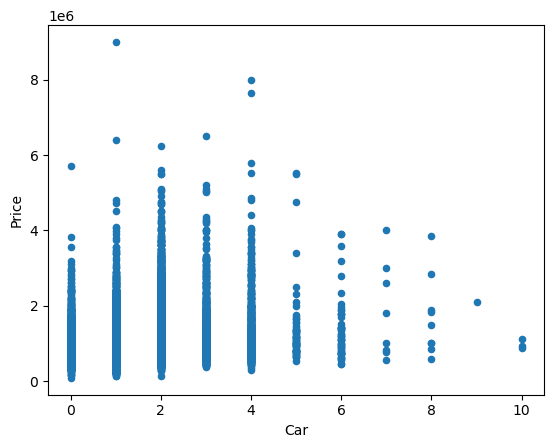

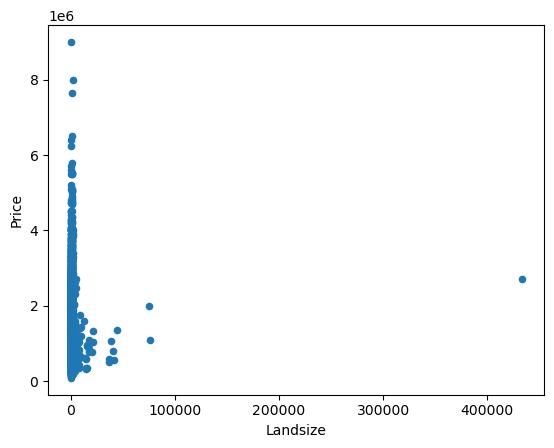

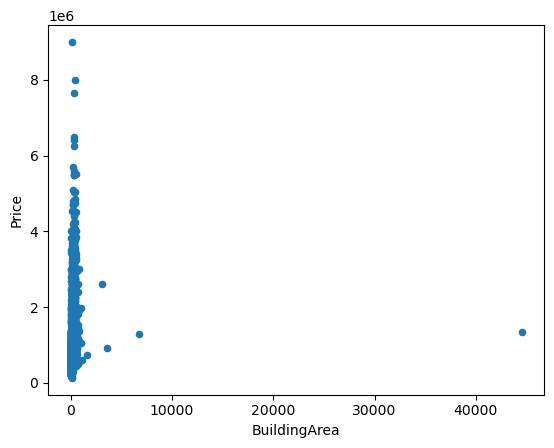

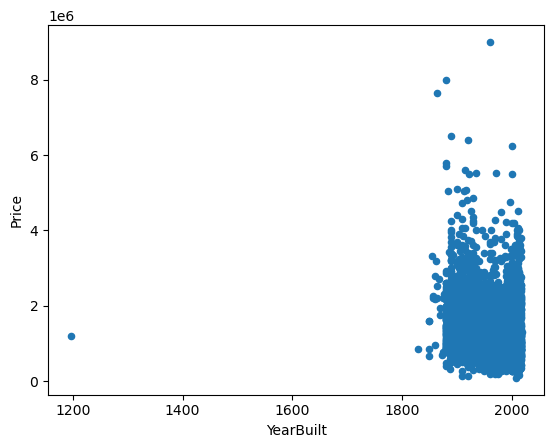

CouncilArea


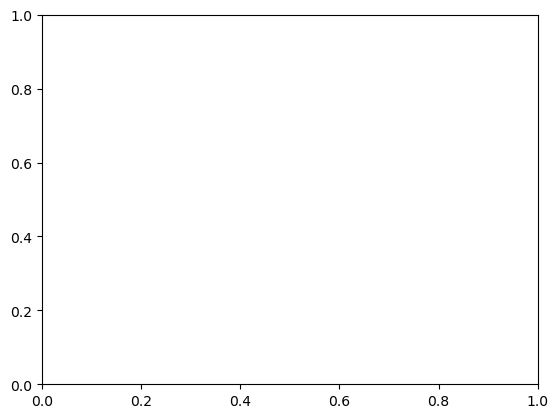

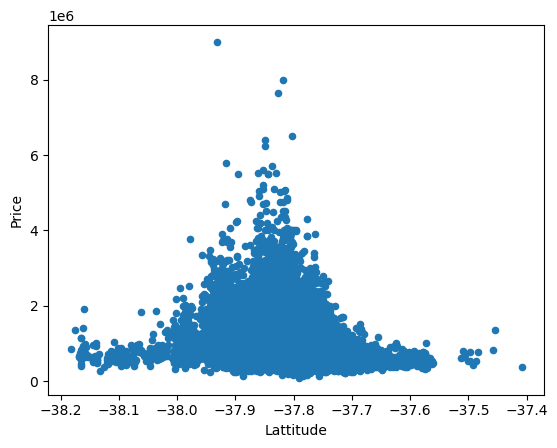

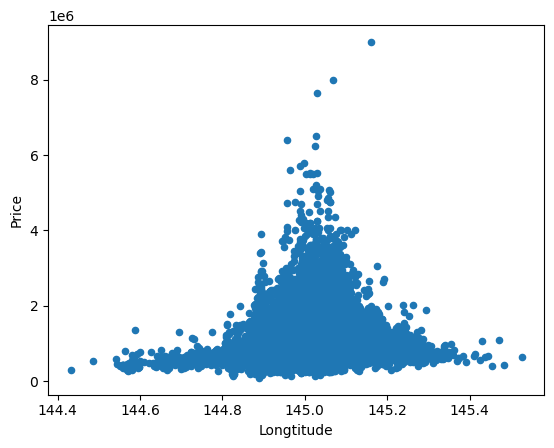

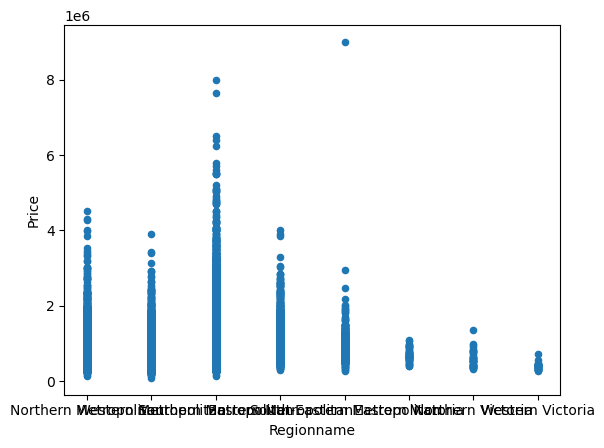

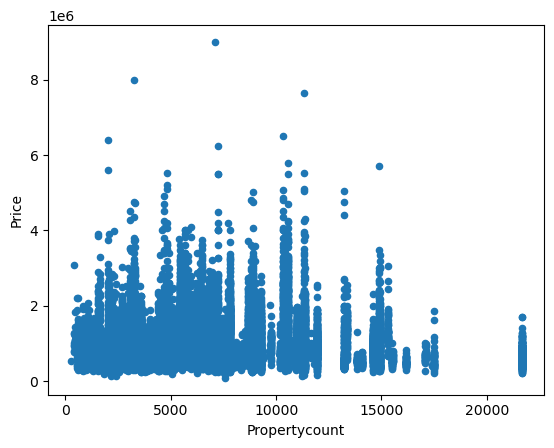

In [144]:
for col in df.drop('Price', axis = 1):
    try:    
        df.plot.scatter(x=col, y='Price')
        plt.show()
    except:
        print(col)


In [ ]:
df.plot.hist('Price')

In [116]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13580 entries, 0 to 13579
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Suburb         13580 non-null  object 
 1   Address        13580 non-null  object 
 2   Rooms          13580 non-null  int64  
 3   Type           13580 non-null  object 
 4   Price          13580 non-null  float64
 5   Method         13580 non-null  object 
 6   SellerG        13580 non-null  object 
 7   Date           13580 non-null  object 
 8   Distance       13580 non-null  float64
 9   Postcode       13580 non-null  float64
 10  Bedroom2       13580 non-null  float64
 11  Bathroom       13580 non-null  float64
 12  Car            13518 non-null  float64
 13  Landsize       13580 non-null  float64
 14  BuildingArea   7130 non-null   float64
 15  YearBuilt      8205 non-null   float64
 16  CouncilArea    12211 non-null  object 
 17  Lattitude      13580 non-null  float64
 18  Longti

In [117]:
df.isnull().sum()

Suburb              0
Address             0
Rooms               0
Type                0
Price               0
Method              0
SellerG             0
Date                0
Distance            0
Postcode            0
Bedroom2            0
Bathroom            0
Car                62
Landsize            0
BuildingArea     6450
YearBuilt        5375
CouncilArea      1369
Lattitude           0
Longtitude          0
Regionname          0
Propertycount       0
dtype: int64

In [118]:
df['Price'].fillna(df['Price'].mean(), inplace = True)
# for col in df:
#     if df[col].isnull().sum() > 0:
#         try:
#             df[col].fillna(df[col].mean(), inplace = True)
#         except:
#             df[col]fillna(df[col].mode()[0], inplace = True)

In [119]:
# df['YearBuilt'].fillna(0000, inplace=True)
df['Car'].unique()

array([ 1.,  0.,  2.,  6.,  5.,  4.,  3.,  8.,  7.,  9., 10., nan])

In [120]:
# df.drop(['CouncilArea', 'BuildingArea'], inplace=True, axis=1)
df.dropna(axis=0, inplace=True)

In [121]:
vif_data = pd.DataFrame()
dfn = df._get_numeric_data()
# dfn['Elseroom'] = dfn['Rooms'] - dfn['Bedroom2'] - dfn['Bathroom']
# dfn['AvgRoomArea'] = dfn['BuildingArea'] / dfn['Rooms']
# dfn.drop(['Rooms'], axis=1, inplace=True)
vif_data["feature"] = dfn.columns
vif_data['VIF'] = [variance_inflation_factor(dfn.values, i) for i in range(len(dfn.columns))]
print(vif_data)

          feature            VIF
0           Rooms     114.441145
1           Price       8.435265
2        Distance       7.353742
3        Postcode    1934.340588
4        Bedroom2     109.298008
5        Bathroom      12.397912
6             Car       5.153093
7        Landsize       1.301834
8    BuildingArea       6.399538
9       YearBuilt    3651.682519
10      Lattitude  329328.951563
11     Longtitude  323519.308325
12  Propertycount       4.114926


# =============================================================

In [122]:
temp = []
for col in df.columns:
    for row in df[col]:
        if isinstance(row, str):
            pass
        else:
            if math.isnan(row):
                if col not in temp:
                    temp.append(col)
print(temp)


[]


# =============================================================

In [123]:
X.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6196 entries, 1 to 12212
Data columns (total 12 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Rooms          6196 non-null   int64  
 1   Distance       6196 non-null   float64
 2   Postcode       6196 non-null   float64
 3   Bedroom2       6196 non-null   float64
 4   Bathroom       6196 non-null   float64
 5   Car            6196 non-null   float64
 6   Landsize       6196 non-null   float64
 7   BuildingArea   6196 non-null   float64
 8   YearBuilt      6196 non-null   float64
 9   Lattitude      6196 non-null   float64
 10  Longtitude     6196 non-null   float64
 11  Propertycount  6196 non-null   float64
dtypes: float64(11), int64(1)
memory usage: 629.3 KB


In [124]:
df['Date'].unique()

array(['4/02/2016', '4/03/2017', '4/06/2016', '7/05/2016', '8/10/2016',
       '12/11/2016', '15/10/2016', '16/07/2016', '17/09/2016',
       '18/03/2017', '18/06/2016', '19/11/2016', '22/08/2016',
       '25/02/2017', '26/07/2016', '27/11/2016', '28/05/2016',
       '30/07/2016', '3/09/2016', '3/12/2016', '7/11/2016', '10/09/2016',
       '10/12/2016', '11/02/2017', '16/04/2016', '22/05/2016',
       '12/06/2016', '23/04/2016', '24/09/2016', '27/06/2016',
       '28/08/2016', '6/08/2016', '13/08/2016', '14/05/2016',
       '11/03/2017', '8/04/2017', '29/04/2017', '6/05/2017', '20/05/2017',
       '22/04/2017', '13/05/2017', '1/07/2017', '3/06/2017', '17/06/2017',
       '24/06/2017', '27/05/2017', '8/07/2017', '12/08/2017',
       '15/07/2017', '22/07/2017', '29/07/2017'], dtype=object)

In [125]:
df['Suburb'].unique()

array(['Abbotsford', 'Airport West', 'Albert Park', 'Alphington',
       'Altona', 'Altona North', 'Armadale', 'Ascot Vale', 'Ashburton',
       'Ashwood', 'Avondale Heights', 'Balaclava', 'Balwyn',
       'Balwyn North', 'Bentleigh', 'Bentleigh East', 'Box Hill',
       'Braybrook', 'Brighton', 'Brighton East', 'Brunswick',
       'Brunswick West', 'Bulleen', 'Burwood', 'Camberwell', 'Canterbury',
       'Carlton North', 'Carnegie', 'Caulfield', 'Caulfield North',
       'Caulfield South', 'Chadstone', 'Clifton Hill', 'Coburg',
       'Coburg North', 'Collingwood', 'Doncaster', 'Eaglemont',
       'Elsternwick', 'Elwood', 'Essendon', 'Essendon North', 'Fairfield',
       'Fitzroy', 'Fitzroy North', 'Flemington', 'Footscray', 'Glen Iris',
       'Glenroy', 'Gowanbrae', 'Hadfield', 'Hampton', 'Hampton East',
       'Hawthorn', 'Heidelberg Heights', 'Heidelberg West', 'Hughesdale',
       'Ivanhoe', 'Kealba', 'Keilor East', 'Kensington', 'Kew',
       'Kew East', 'Maidstone', 'Malvern', 

In [126]:
y = df['Price']
dummy_vars = pd.get_dummies(df[['Type','Regionname', 'YearBuilt']])
other_vars = df[['Rooms', 'Bedroom2', 'Bathroom', 'Landsize', 'Propertycount']]
X = pd.concat([dfn.drop('Price', axis=1), dummy_vars], axis=1)
X = dfn.drop('Price', axis=1)

In [127]:
? DecisionTreeRegressor

Init signature:
 DecisionTreeRegressor(
    *,
    criterion='squared_error',
    splitter='best',
    max_depth=None,
    min_samples_split=2,
    min_samples_leaf=1,
    min_weight_fraction_leaf=0.0,
    max_features=None,
    random_state=None,
    max_leaf_nodes=None,
    min_impurity_decrease=0.0,
    ccp_alpha=0.0,
)
Docstring:     
A decision tree regressor.

Read more in the :ref:`User Guide <tree>`.

Parameters
----------
criterion : {"squared_error", "friedman_mse", "absolute_error",             "poisson"}, default="squared_error"
    The function to measure the quality of a split. Supported criteria
    are "squared_error" for the mean squared error, which is equal to
    variance reduction as feature selection criterion and minimizes the L2
    loss using the mean of each terminal node, "friedman_mse", which uses
    mean squared error with Friedman's improvement score for potential
    splits, "absolute_error" for the mean absolute error, which minimizes
    the L1 loss us

<AxesSubplot:ylabel='Frequency'>

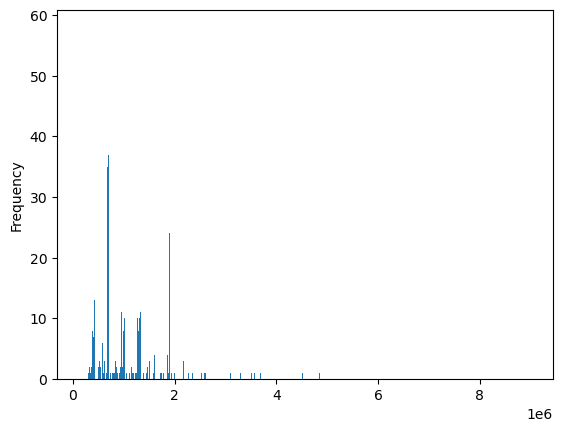

In [140]:
dfn['Price'].plot.hist(bins=10000)

In [136]:
model = DecisionTreeRegressor(min_samples_leaf= 0.005, max_depth=5)

x = 0
temp = []
for i in range(100):
    Xt, Xv, yt, yv = train_test_split(X, y, test_size=.2, random_state=x)
    model.fit(Xt, yt)
    temp.append(model.score(Xv, yv))
    x += 1

print(statistics.mean(temp))

0.6427354094950021
